In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install transformers
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.3 MB/s eta

In [ ]:
import pathlib
import textwrap
import json
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

import gradio as gr


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
from google.colab import userdata

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Ex de Tabela 3.xlsx'
#PATH = '/content/teste.xlsx'

In [ ]:
import pandas as pd

df = pd.read_excel(PATH)

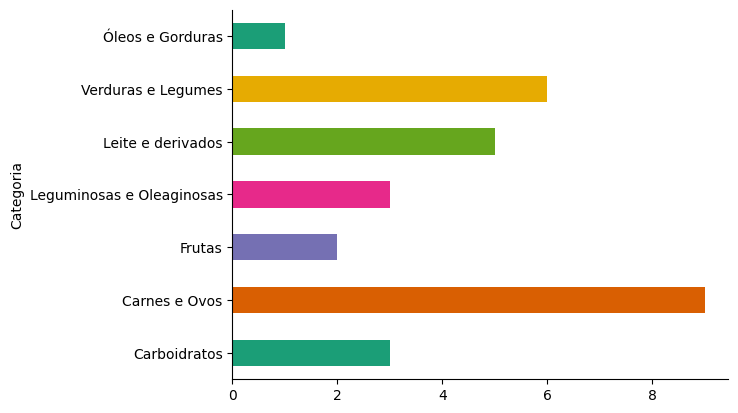

In [ ]:
# @title Categoria

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sentence_transformers import SentenceTransformer
modelo = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Função para gerar embeddings
def gerar_embeddings(texto):
    # Handle potential float values
    if isinstance(texto, float):
        return None  # Or any appropriate handling for float values
    return modelo.encode(texto).tolist()

df['Embeddings'] = df['Alimento'].apply(lambda x: gerar_embeddings(x))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df.head()

,Tipo de Dieta,Subtipo de Dieta,Alimento,Quantidade,Proteínas (g),Fibras (g),Gorduras (g),Colesterol (mg),Sódio (mg),Potássio (mg),Cálcio (mg),Categoria,Embeddings
0,Emagrecimento,Low Carb,Peito de frango,100g,31.0,0.0,3.6,85.0,74.0,256.0,15.0,Carnes e Ovos,"[-0.005665627773851156, -0.04045175388455391, ..."
1,NaN,NaN,Abacate,1/2 unidade,1.5,7.0,15.0,0.0,7.0,487.0,12.0,Frutas,"[-0.0771496593952179, 0.04548235982656479, -0...."
2,NaN,NaN,Amêndoas,30g,6.0,3.5,14.0,0.0,0.0,200.0,75.0,Leguminosas e Oleaginosas,"[-0.07690828293561935, -0.03479247912764549, -..."
3,NaN,NaN,Brócolis cozido,1 xícara,3.7,5.1,0.4,0.0,64.0,457.0,62.0,Verduras e Legumes,"[-0.06080644577741623, -0.1342705637216568, -0..."
4,NaN,NaN,Queijo cottage,100g,11.0,0.0,4.3,17.0,315.0,104.0,100.0,Leite e derivados,"[-0.12407145649194717, 0.16603942215442657, -0..."


In [ ]:
cosine_similarity(np.array([1,2,3]).reshape(1, -1), np.array([3,5,3]).reshape(1, -1))[0][0]

0.8966530605331448

In [ ]:
# Função para recomendar dieta com base na entrada do usuário
def recomendar_dieta(entrada_usuario, df):
    embedding_usuario = gerar_embeddings(entrada_usuario)
    # Handle NaN embeddings
    df_valid_embeddings = df.dropna(subset=['Embeddings'])  # Drop rows with NaN embeddings
    df_valid_embeddings['Similaridade'] = df_valid_embeddings['Embeddings'].apply(lambda x: cosine_similarity([x], [embedding_usuario])[0][0])
    dieta_recomendada = df_valid_embeddings.sort_values(by='Similaridade', ascending=False).head(10)
    dieta_recomendada = dieta_recomendada.drop(columns=['Tipo de Dieta', 'Subtipo de Dieta'])
    return dieta_recomendada

In [ ]:
# Exemplo de entrada do usuário
entrada_usuario = "Estou procurando uma dieta Mediterrânea com pouca proteína."
dieta_recomendada = recomendar_dieta(entrada_usuario, df)
print(dieta_recomendada)

               Alimento  Quantidade  Proteínas (g)  Fibras (g)  Gorduras (g)  \
20      Iogurte natural        200g            6.0         0.0           3.5   
32        Iogurte grego        170g           10.0         0.0           0.7   
14        Iogurte grego        170g           10.0         0.0           0.7   
13  Grão-de-bico cozido  1/2 xícara            7.3         6.2           2.1   
24   Carne bovina magra        100g           26.0         0.0          10.0   
10     Espinafre cozido    1 xícara            5.4         4.3           0.5   
22        Frango assado        100g           25.0         0.0           7.5   
28        Frango assado        100g           25.0         0.0           7.5   
33        Salmão assado        100g           25.0         0.0          13.0   
7         Salmão assado        100g           25.0         0.0          13.0   

    Colesterol (mg)  Sódio (mg)  Potássio (mg)  Cálcio (mg)  \
20             14.0        80.0          240.0        24

<ipython-input-15-d4c4fcfcb1df>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_embeddings['Similaridade'] = df_valid_embeddings['Embeddings'].apply(lambda x: cosine_similarity([x], [embedding_usuario])[0][0])


In [ ]:
def recomendar_dieta(entrada_usuario):
    embedding_usuario = gerar_embeddings(entrada_usuario)
    # Handle NaN embeddings
    df_valid_embeddings = df.dropna(subset=['Embeddings'])  # Drop rows with NaN embeddings
    df_valid_embeddings['Similaridade'] = df_valid_embeddings['Embeddings'].apply(lambda x: cosine_similarity([x], [embedding_usuario])[0][0])
    dieta_recomendada = df_valid_embeddings.sort_values(by='Similaridade', ascending=False).head(10)
    dieta_recomendada = dieta_recomendada.drop(columns=['Tipo de Dieta', 'Subtipo de Dieta'])
    return dieta_recomendada

In [ ]:
tabs = gr.Interface(
    fn=recomendar_dieta,
    inputs = "text",
    outputs = "dataframe",
    title = "Sistema de Recomendação de Dieta",
    description = "Digite sua solicitação de dieta para receber uma tabela com os alimentos recomendados."
)

if __name__ == "__main__":
    tabs.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9b47457919dfc00fbc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


<ipython-input-17-fb7d5411ce0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_embeddings['Similaridade'] = df_valid_embeddings['Embeddings'].apply(lambda x: cosine_similarity([x], [embedding_usuario])[0][0])


In [ ]:
import gradio as gr
import pandas as pd

def gradio_recomendar_dieta(entrada_usuario, df):
    dieta_recomendada = recomendar_dieta(entrada_usuario, df)
    return dieta_recomendada

demo = gr.Interface(
    fn=gradio_recomendar_dieta,
    inputs="text",
    outputs="dataframe",
    title="Sistema de Recomendação de Dieta",
    description="Digite sua solicitação de dieta para receber uma tabela com os alimentos recomendados."
)

demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1007: UserWarning: Expected 2 arguments for function <function gradio_recomendar_dieta at 0x7bcbb5588040>, received 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1011: UserWarning: Expected at least 2 arguments for function <function gradio_recomendar_dieta at 0x7bcbb5588040>, received 1.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5f91ca7f83df984167.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
